In [1]:
using ControlSystems
using Plots
using Interact
using OrdinaryDiffEq

┌ Info: Recompiling stale cache file /Users/roberto/.julia/compiled/v1.1/ControlSystems/WTvAN.ji for ControlSystems [a6e380b2-a6ca-5380-bf3e-84a91bcd477e]
└ @ Base loading.jl:1184
┌ Info: Recompiling stale cache file /Users/roberto/.julia/compiled/v1.1/Interact/XmYW4.ji for Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
└ @ Base loading.jl:1184


HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-16400120050687660374\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-2027013397948627194\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/f040922749f00dc58e5498a0b19af566418ea107-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-16400120050687660374\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")

┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Interact [c601a237-2ae4-5e1e-952c-7a85b0c7eef1]
│   exception = ErrorException("Required dependency Knockout [bcebb21b-c2e3-54f8-a781-646b90f6d2cc] failed to load from a cache file.")
└ @ Base loading.jl:969


In [2]:
#pyplot(size = (600,300), legend = false)
gr(size = (900,300), legend = false)

Plots.GRBackend()

In [3]:
s = tf("s")

TransferFunction{ControlSystems.SisoRational{Int64}}
1s
--
1

Continuous-time transfer function model

In [4]:
G1 = (10)/(s*(s+1))

TransferFunction{ControlSystems.SisoRational{Int64}}
   10
---------
1s^2 + 1s

Continuous-time transfer function model

In [5]:
minreal(G1)

TransferFunction{ControlSystems.SisoRational{Float64}}
     10.0
---------------
1.0*s^2 + 1.0*s

Continuous-time transfer function model

In [6]:
Gc1 = 1.2287*(s+1.9432)/(s+4.6458)

TransferFunction{ControlSystems.SisoRational{Float64}}
1.2287*s + 2.3876098399999997
-----------------------------
       1.0*s + 4.6458

Continuous-time transfer function model

In [21]:
minreal(Gc1)

TransferFunction{ControlSystems.SisoRational{Float64}}
1.2287*s + 2.3876098399999997
-----------------------------
       1.0*s + 4.6458

Continuous-time transfer function model

In [22]:
k = 0.9
α = 1/3
T = 1
Gc2 = k*α*(T*s+1)/(α*T*s+1)

TransferFunction{ControlSystems.SisoRational{Float64}}
       0.3*s + 0.3
--------------------------
0.3333333333333333*s + 1.0

Continuous-time transfer function model

In [23]:
minreal(Gc2)

TransferFunction{ControlSystems.SisoRational{Float64}}
0.9*s + 0.9
-----------
1.0*s + 3.0

Continuous-time transfer function model

In [24]:
feedback(G1, tf(1))

TransferFunction{ControlSystems.SisoRational{Int64}}
       10*s^2 + 10*s
----------------------------
1s^4 + 2*s^3 + 11*s^2 + 10*s

Continuous-time transfer function model

In [25]:
minreal(feedback(G1, tf(1)))

TransferFunction{ControlSystems.SisoRational{Float64}}
                      10.0
-------------------------------------------------
1.0*s^2 + 0.9999999999999996*s + 9.99999999999999

Continuous-time transfer function model

In [26]:
?minreal

search: minreal sminreal ExtrapolationMidpointHairerWanner



`tf = minreal(tf::TransferFunction, eps=sqrt(eps()))`

Create a minimial representation of each transfer function in `tf` by cancelling poles and zeros will promote system to an appropriate numeric type

---

`minsys = minreal(s::StateSpace, tol=sqrt(eps()))` is implemented via `baltrunc` and returns a system on diagonal form.


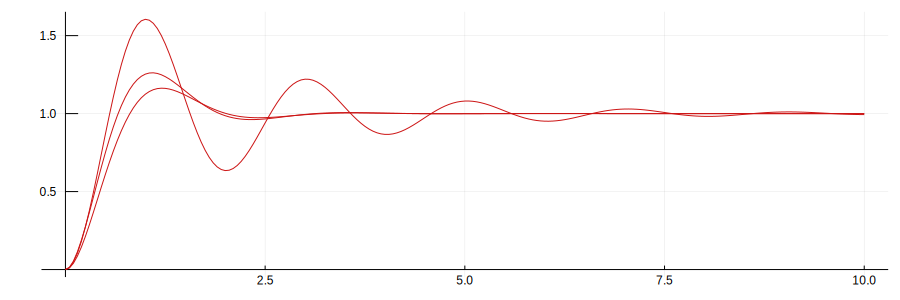

In [27]:
#stepplot(G1, 10)
stepplot(feedback(G1, tf(1)), 10)
stepplot!(feedback(Gc1*G1, tf(1)), 10)
stepplot!(feedback(Gc2*G1, tf(1)), 10)
xlabel!("")
ylabel!("")
title!("")
plot!(frame_style=:origin)
#xlims!(-5, 1)
#ylims!(-10,10)

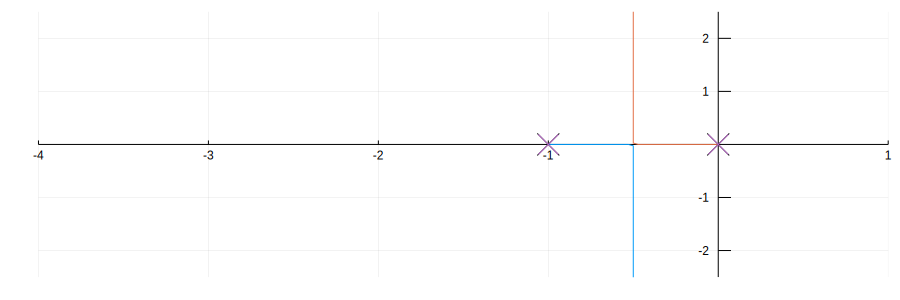

In [77]:
rlocusplot(G1)
xlabel!("")
ylabel!("")
title!("")
plot!(frame_style=:origin)
xlims!(-4, 1)
ylims!(-2.5,2.5)

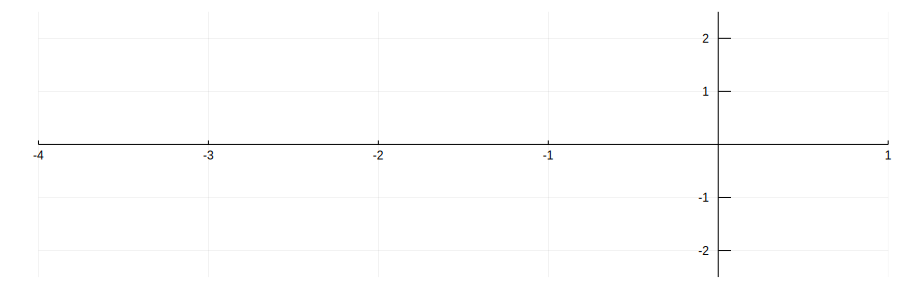

In [84]:
rlocusplot(minreal(feedback(G1, tf(1))))
xlabel!("")
ylabel!("")
title!("")
plot!(frame_style=:origin)
xlims!(-4, 1)
ylims!(-2.5,2.5)

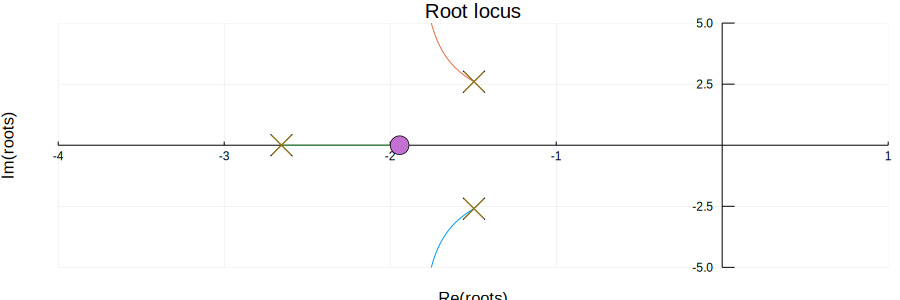

In [81]:
rlocusplot(minreal(feedback(Gc1*G1, tf(1))), range(1e-6,stop=100,length=1000))
plot!(frame_style=:origin)
xlims!(-4, 1)
ylims!(-5,5)

In [72]:
bodeplot(G)
xlabel!("")
ylabel!("")
title!("")

UndefVarError: UndefVarError: G not defined

In [38]:
pole(G)

2-element Array{Complex{Float64},1}:
 -1.0 + 0.0im
  0.0 + 0.0im

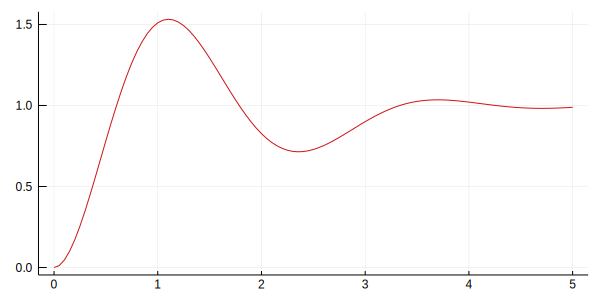

In [43]:
stepplot((Control*G)/(1+Control*G))
xlabel!("")
ylabel!("")
title!("")

In [34]:
rlocusplot((Control*G)/(1+Control*G))
xlabel!("")
ylabel!("")
title!("")
xlims!(-3.2, 0.5)
ylims!(-5,5)

UndefVarError: UndefVarError: Control not defined

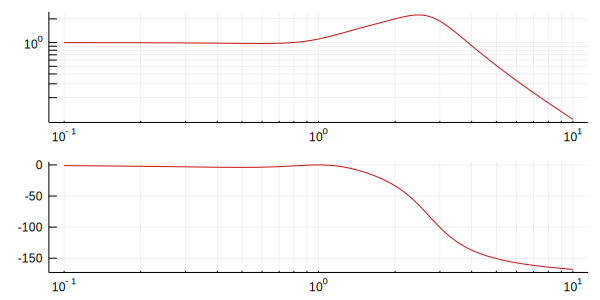

In [51]:
bodeplot((Control*G)/(1+Control*G))
xlabel!("")
ylabel!("")
title!("")

In [49]:
pole((Control*G)/(1+Control*G))

8-element Array{Complex{Float64},1}:
   -2.893289196304497 + 0.0im               
  -0.8468093810449009 + 2.593658750846635im 
  -0.8468093810449009 - 2.593658750846635im 
  -0.6531906189550952 + 0.9574332335329im   
  -0.6531906189550952 - 0.9574332335329im   
 -0.05335540184775119 + 0.8297035528624044im
 -0.05335540184775119 - 0.8297035528624044im
                  0.0 + 0.0im               

In [52]:
savefig("myplot.png")
savefig("myplot.svg")
savefig("myplot.pdf")

![](./myplot.svg)

In [13]:
width, height = 700, 300

colors = ["black", "gray", "silver", "maroon",
          "red", "olive", "yellow", "green", "lime",
          "teal", "aqua", "navy", "blue", "purple", "fuchsia"]

color(i) = colors[i%length(colors)+1]

ui = @manipulate for nsamples in 1:200,
        sample_step in slider(0.01:0.01:1.0, value=0.1, label="sample step"),
        phase in slider(0:0.1:2pi, value=0.0, label="phase"),
        radii in 0.1:0.1:60
    
    cxs_unscaled = [i*sample_step + phase for i in 1:nsamples]
    cys = sin.(cxs_unscaled) .* height/3 .+ height/2
    cxs = cxs_unscaled .* width/4pi
    
    dom"svg:svg[width=$width, height=$height]"(
        (dom"svg:circle[cx=$(cxs[i]), cy=$(cys[i]), r=$radii, fill=$(color(i))]"()
            for i in 1:nsamples)...
    )
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Scope(Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :label), Any["nsamples"], Dict{Symbol,Any}(:className=>"interact ",:style=>Dict{Any,Any}(:padding=>"5px 10px 0px 10px")))], Dict{Symbol,Any}(:className=>"interact-flex-row-left")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :input), Any[], Dict{Symbol,Any}(:max=>200,:min=>1,:attributes=>Dict{Any,Any}(:type=>"range",Symbol("data-bind")=>"numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient"=>"horizontal"),:step=>1,:className=>"slider slider is-fullwidth",:style=>Dict{Any,Any}()))], Dict{Symbol,Any}(:className=>"interact-flex-row-center")), Node{DOM}(DOM(:html, :div), Any[Node{DOM}(DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes=>Dict("data-bind"=>"text: formatted_val")))], Dict{Symbol,Any}(:className=>"interact-flex-row-right"))], Dict{Symbol,Any}(:className=>"interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes"=>(Observable{Int64} with 1 listeners. Value:
0, nothing),"index"=>(Observable{Int64} with 2 listeners. Value:
100, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "/Users/roberto/.julia/packages/Knockout/1sDlc/src/../assets/knockout.js"), Asset("js", "knockout_punches", "/Users/roberto/.julia/packages/Knockout/1sDlc/src/../assets/knockout_punches.js"), Asset("js", nothing, "/Users/roberto/.julia/packages/InteractBase/l8cEC/src/../assets/all.js"), Asset("css", nothing, "/Users/roberto/.julia/packages/InteractBase/l8cEC/src/../assets/style.css"), Asset("css", nothing, "/Users/roberto/.julia/packages/Interact/0klKX/src/../assets/bulma_confined.min.css")], Dict{Any,Any}("changes"=>Any[JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index"=>Any[JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), ConnectionPool(Channel{Any}(sz_max:9223372036854775807,sz_curr:0), Set(AbstractConnection[]), Channel{AbstractConnection}(sz_max:32,sz_curr:0)), WebIO.JSString[JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\",\"13\",\"14\",\"15\",\"16\",\"17\",\"18\",\"19\",\"20\",\"21\",\"22\",\"23\",\"24\",\"25\",\"26\",\"27\",\"28\",\"29\",\"30\",\"31\",\"32\",\"33\",\"34\",\"35\",\"36\",\"37\",\"38\",\"39\",\"40\",\"41\",\"42\",\"43\",\"44\",\"45\",\"46\",\"47\",\"48\",\"49\",\"50\",\"51\",\"52\",\"53\",\"54\",\"55\",\"56\",\"57\",\"58\",\"59\",\"60\",\"61\",\"62\",\"63\",\"64\",\"65\",\"66\",\"67\",\"68\",\"69\",\"70\",\"71\",\"72\",\"73